In [1]:
import datetime
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from QueryMSC import workflow_tools

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"

In [68]:
start_time = datetime.datetime(1980, 1, 1)
end_time = datetime.datetime(2019, 1, 31)

msc = workflow_tools(connection_string, start_time, end_time, month=1)

In [69]:
#precip = msc.annual_rain()

In [70]:
#pd.read_sql(precip.statement, msc.engine).head()

In [71]:
#variables = msc.query_variables()

In [72]:
#pd.read_sql(variables.statement, msc.engine).head()

In [73]:
temp = msc.design_temp_25()
print(temp)

SELECT percentile_cont(%(percentile_cont_1)s) WITHIN GROUP (ORDER BY crmp.obs_raw.datum ASC) AS temp, min(crmp.obs_raw.obs_time) AS time_min, max(crmp.obs_raw.obs_time) AS time_max, crmp.meta_history.lat AS crmp_meta_history_lat, crmp.meta_history.lon AS crmp_meta_history_lon, crmp.meta_history.elev AS crmp_meta_history_elev, crmp.meta_history.history_id AS crmp_meta_history_history_id 
FROM crmp.meta_vars, crmp.obs_raw JOIN crmp.meta_history ON crmp.meta_history.history_id = crmp.obs_raw.history_id 
WHERE crmp.obs_raw.obs_time >= %(obs_time_1)s AND crmp.obs_raw.obs_time <= %(obs_time_2)s AND EXTRACT(month FROM crmp.obs_raw.obs_time) = %(param_1)s AND crmp.meta_vars.standard_name = %(standard_name_1)s AND crmp.meta_vars.vars_id = %(vars_id_1)s AND crmp.obs_raw.datum != %(datum_1)s GROUP BY crmp.meta_history.lat, crmp.meta_history.lon, crmp.meta_history.history_id


In [74]:
start = time.time()
df = pd.read_sql(temp.statement, msc.engine)
end = time.time()
print((end-start)/60., 'minutes', (end-start), 'seconds')

7.109405775864919 minutes 426.56434655189514 seconds


In [78]:
df['temp C'] = df['temp']*0.1
df_new = df[(df['temp C'] > -40) & (df['temp C'] < 10)]
df.head()

,temp,time_min,time_max,lat,lon,elev,history_id,temp C
0,3.6,1985-01-01,1996-01-27,48.8667,-123.283,4.0,3,0.36
1,3.8,1991-01-11,1995-01-31,48.4000,-123.483,17.0,4,0.38
2,10.0,1980-01-10,1980-01-31,48.5833,-123.517,85.3,5,1.00
3,4.0,1988-01-08,1997-01-31,48.6000,-123.467,38.0,9,0.40
4,2.0,1980-01-01,1980-01-31,48.5667,-123.450,30.5,10,0.20


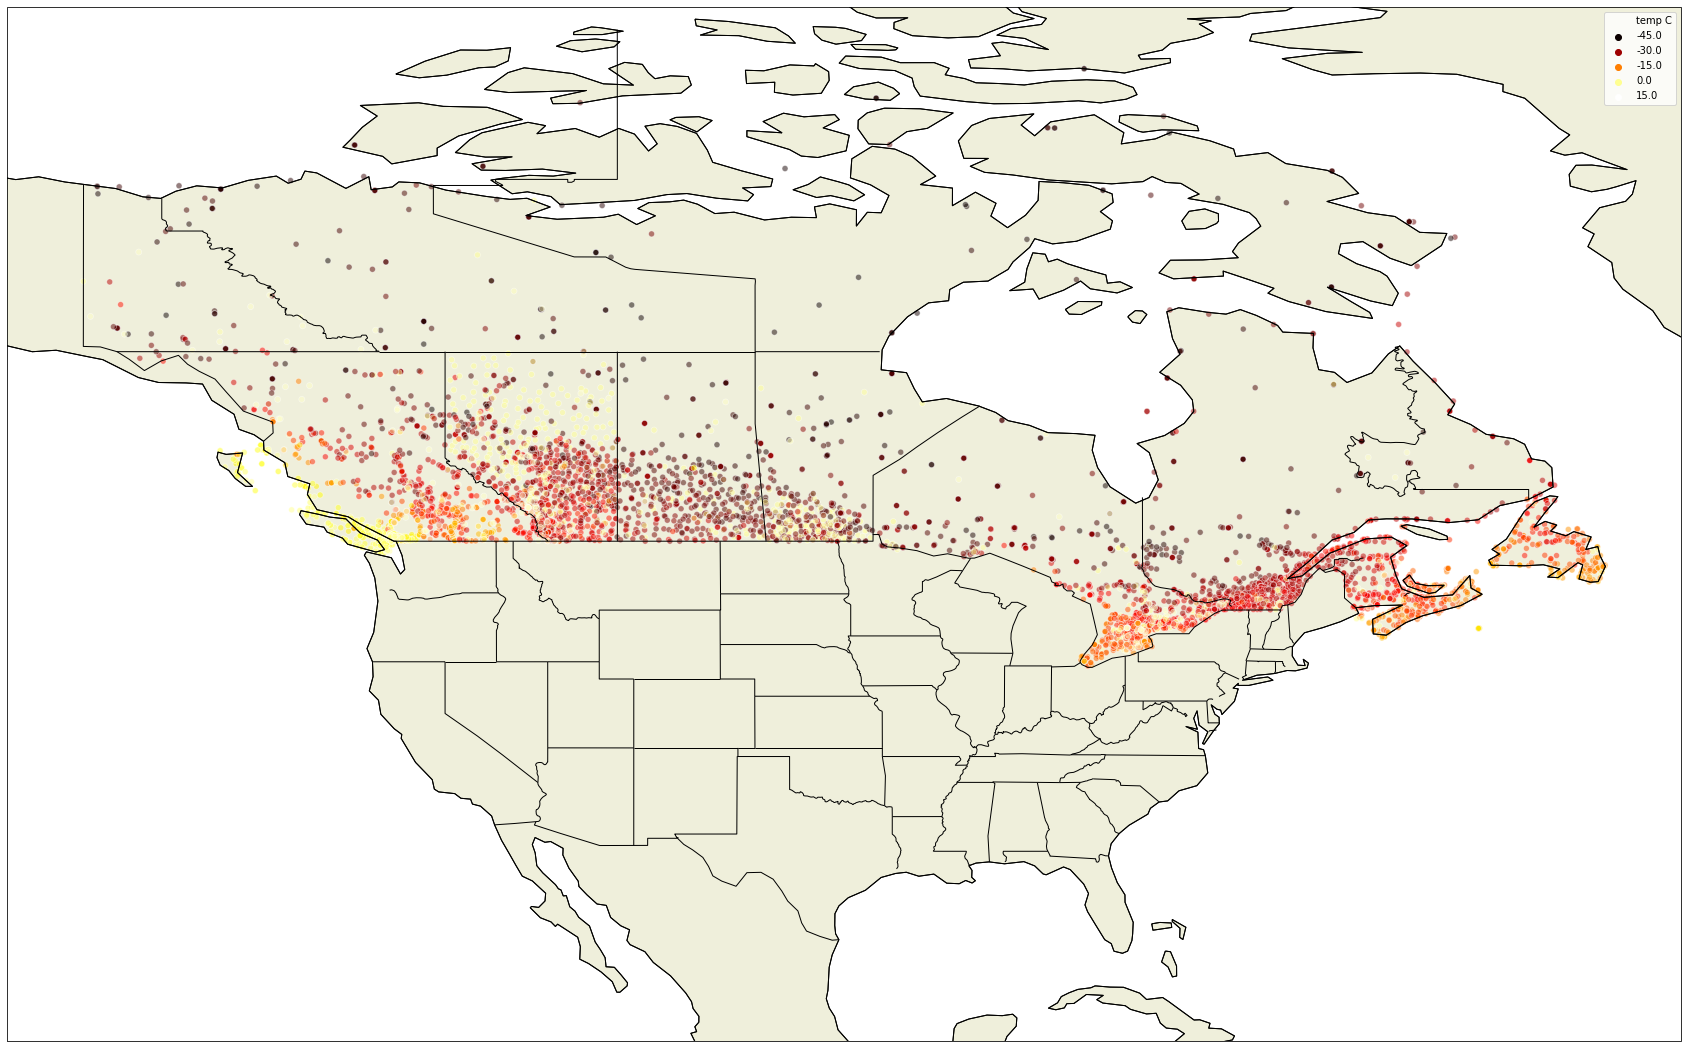

In [79]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (30, 50))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(states_provinces, edgecolor='black')

sns.scatterplot(df_new['lon'], df_new['lat'], hue=df_new['temp C'], palette="hot", alpha=0.5)
plt.ylim(20, 80)
plt.savefig('spatial_25_jan')

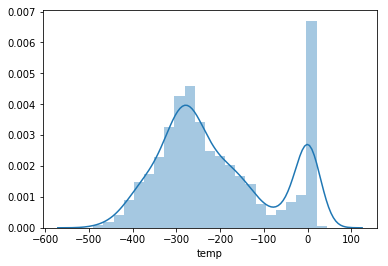

In [18]:
sns.distplot(df['temp'])
#plt.xlim(-600, 200)
plt.savefig('Fahrenheit')

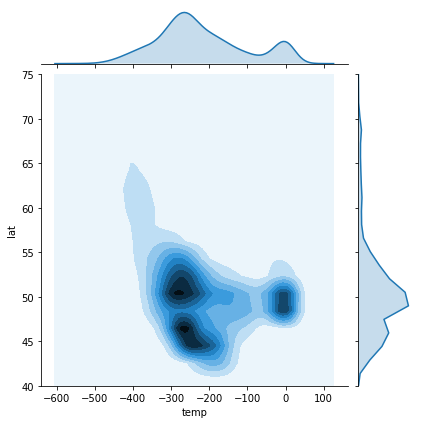

In [95]:
ax = sns.jointplot(x="temp", y="lat", kind = 'kde', data=df, label = '2.5th percentile')
plt.ylim(40., 75.)
#plt.xlim(-10, 20)
plt.savefig("kde_density_25th_temp")

In [96]:
from pycds import *
stations
for station in stations[:-1]:
    q = msc.session.query(History.station_id, Variable.unit).filter((int(station),) == History.station_id).filter(Variable.id==1510).first()
    if q[1] != '0.1 Celsius':
        print(q[1])